In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

In [6]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_test['Transported'] = False
df = pd.concat([df_train, df_test], sort=False)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df.isna().sum().sort_values(ascending=False)

CryoSleep       310
ShoppingMall    306
Cabin           299
VIP             296
Name            294
FoodCourt       289
HomePlanet      288
Spa             284
Destination     274
Age             270
VRDeck          268
RoomService     263
PassengerId       0
Transported       0
dtype: int64

<Axes: xlabel='VRDeck', ylabel='Count'>

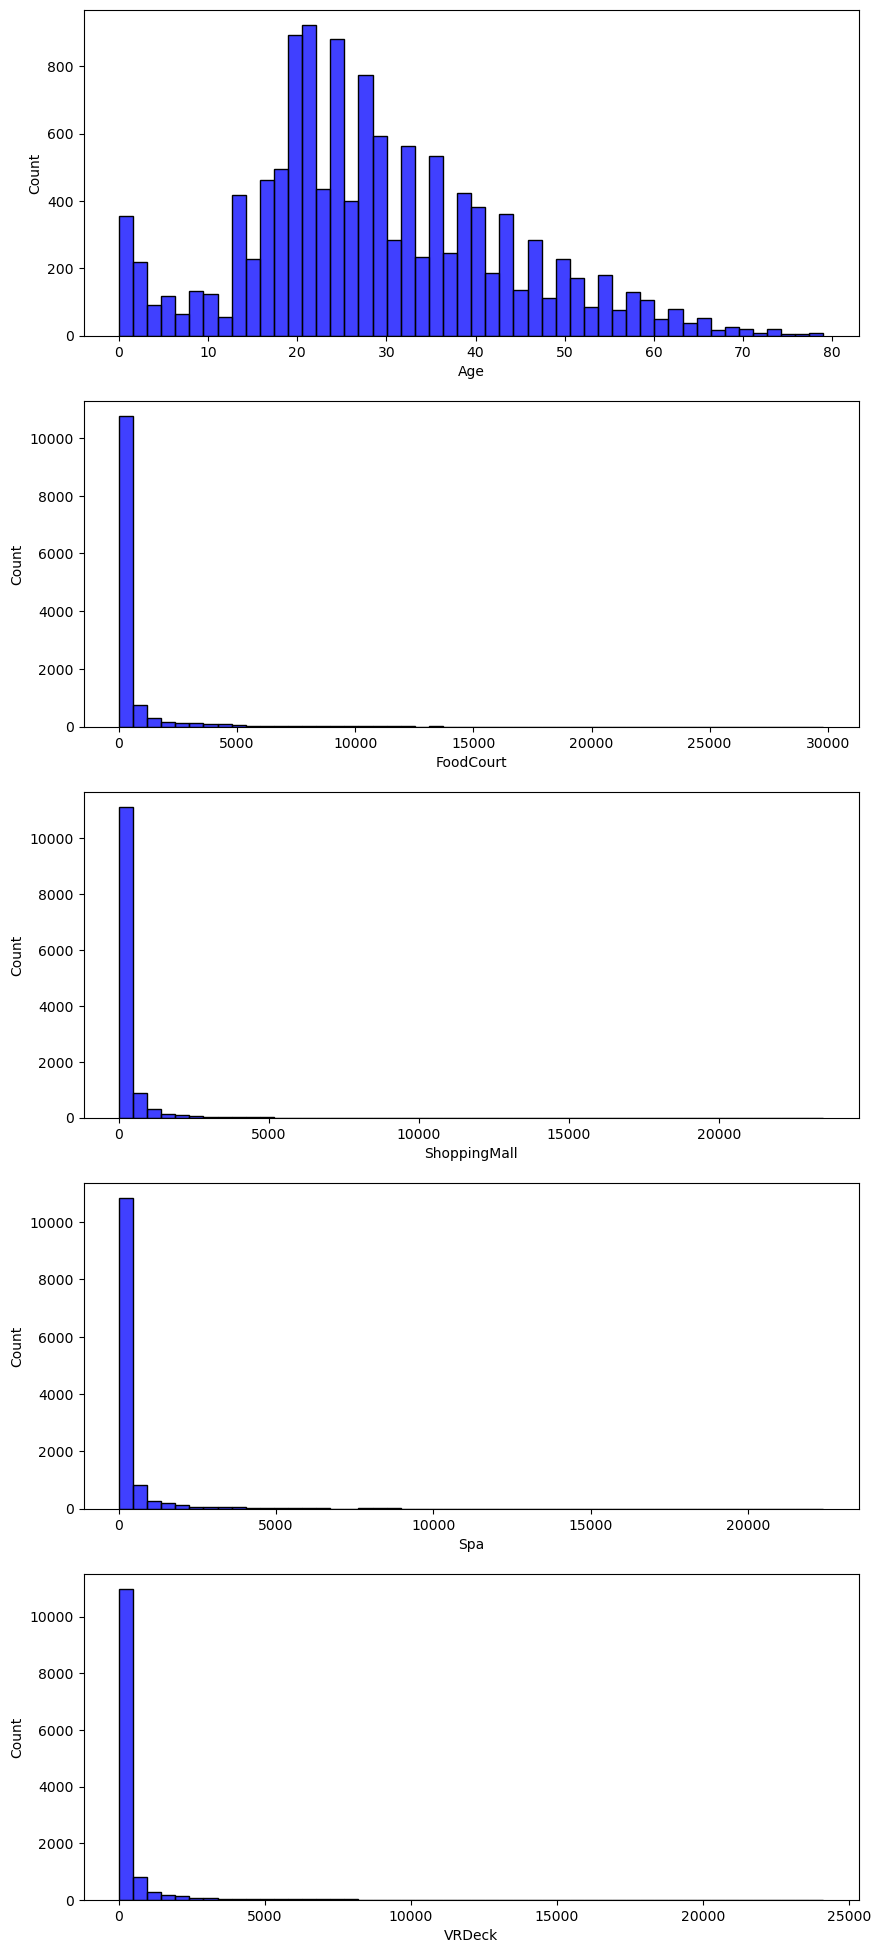

In [8]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4])

Manual pre-processing of null values

In [9]:
df.dtypes.value_counts()

object     7
float64    6
bool       1
Name: count, dtype: int64

Numerice dtype

In [10]:
df_numeric = df.select_dtypes(include=["float"])
df_numeric

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


In [11]:
Median_columns = ['Age']
Mean_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in Median_columns:
    df_numeric[col] = df_numeric[col].fillna(df_numeric[col].median())
for col in Mean_columns:
    df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mean())
df_numeric

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,27.0,0.0,0.0,0.0,0.0,0.0
4275,27.0,0.0,2680.0,0.0,0.0,523.0


In [12]:
df_numeric.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Boolean dtype

In [13]:
df_bool = df.select_dtypes(include=['bool'])
df_bool.isna().sum()

Transported    0
dtype: int64

Object dtype

In [14]:
df_object = df.select_dtypes(include=['object'])
df_object['Group'] = df_object.PassengerId.str.split('_').str[0].astype(int)
df_object['Deck'] = df_object.Cabin.str.split('/').str[0]
df_object['Num'] = df_object.Cabin.str.split('/').str[1]
df_object['Side'] = df_object.Cabin.str.split('/').str[2]
df_object = df_object.drop(columns={'PassengerId', 'Cabin', 'Name' })
df_object_numeric = df_object[['Group', 'Num']]
df_object = df_object.drop(columns={'Group', 'Num'})
df_object

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,Europa,False,TRAPPIST-1e,False,B,P
1,Earth,False,TRAPPIST-1e,False,F,S
2,Europa,False,TRAPPIST-1e,True,A,S
3,Europa,False,TRAPPIST-1e,False,A,S
4,Earth,False,TRAPPIST-1e,False,F,S
...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,False,G,S
4273,Earth,False,TRAPPIST-1e,False,NaN,NaN
4274,Mars,True,55 Cancri e,False,D,P
4275,Europa,False,NaN,False,D,P


In [15]:
df_object = df_object.fillna('null')
df_object_encoded = pd.get_dummies(df_object, dtype=int)
for col in df_object_encoded.columns:
    if 'null' in col:
        df_object_encoded = df_object_encoded.drop(col, axis=1)
        print(col)

HomePlanet_null
CryoSleep_null
Destination_null
VIP_null
Deck_null
Side_null


In [16]:
df_object_encoded.isna().sum().max()

0

In [17]:
df_object_numeric.Group = pd.to_numeric(df_object_numeric.Group, errors='coerce')
df_object_numeric.Num = pd.to_numeric(df_object_numeric.Num, errors='coerce')
df_object_numeric.Num = df_object_numeric.Num.fillna(df_object_numeric.Num.mode()[0])
df_object_numeric.isna().sum()

Group    0
Num      0
dtype: int64

In [18]:
df_numeric = pd.concat([df_numeric, df_object_numeric], axis=1)
df_numeric

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,2,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,3,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,4,1.0
...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,9266,1496.0
4273,42.0,0.0,847.0,17.0,10.0,144.0,9269,82.0
4274,27.0,0.0,0.0,0.0,0.0,0.0,9271,296.0
4275,27.0,0.0,2680.0,0.0,0.0,523.0,9273,297.0


In [19]:
merged_df = pd.concat([df_numeric, df_object_encoded, df_bool], axis=1)
merged_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,...,1,0,0,0,0,0,0,1,0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,2,0.0,1,0,...,0,0,0,0,1,0,0,0,1,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,0.0,0,1,...,0,0,0,0,0,0,0,0,1,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,3,0.0,0,1,...,0,0,0,0,0,0,0,0,1,False
4,16.0,303.0,70.0,151.0,565.0,2.0,4,1.0,1,0,...,0,0,0,0,1,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,9266,1496.0,1,0,...,0,0,0,0,0,1,0,0,1,False
4273,42.0,0.0,847.0,17.0,10.0,144.0,9269,82.0,1,0,...,0,0,0,0,0,0,0,0,0,False
4274,27.0,0.0,0.0,0.0,0.0,0.0,9271,296.0,0,0,...,0,0,1,0,0,0,0,1,0,False
4275,27.0,0.0,2680.0,0.0,0.0,523.0,9273,297.0,0,1,...,0,0,1,0,0,0,0,1,0,False


In [20]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
training_data = merged_df[:len(df_train)]
X = training_data.drop(columns="Transported")
y = training_data["Transported"]
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,2,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,0.0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,3,0.0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,4,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,9276,98.0,0,1,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,9278,1499.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,9279,1500.0,1,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,9280,608.0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [22]:
xgb_model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01)
xgb_score = cross_val_score(xgb_model, X, y, cv=KFold(n_splits=5, shuffle=True))
xgb_score.mean(), xgb_score

(0.8085818404159368,
 array([0.80333525, 0.81311098, 0.80736055, 0.80897583, 0.81012658]))

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_score = cross_val_score(knn_model, X, y, cv=KFold(n_splits=5, shuffle=True))
knn_score.mean(), knn_score

(0.7563558147183247,
 array([0.75848189, 0.74870615, 0.76078206, 0.75949367, 0.7543153 ]))

In [24]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_score = cross_val_score(rf_model, X, y, cv=KFold(n_splits=5, shuffle=True))
rf_score.mean(), rf_score

(0.8006455835165772,
 array([0.79643473, 0.79643473, 0.79700978, 0.80782509, 0.80552359]))

In [37]:
xgb_model.fit(X, y)
to_pred = merged_df[len(df_train):]
to_predX= to_pred.drop(columns='Transported')
xgb_model.predict(to_predX)

array([1, 0, 1, ..., 1, 1, 1])